
---

## XII Escola do CBPF - Centro Brasileiro de Pesquisas Físicas/MCTIC
## Curso 13 - Inteligência Artificial Utilizando Deep Learning e Aplicações em Física
## Rio de Janeiro -22 de Julho - 02 de agosto de 2019
## "Programa: Classificação de Pacientes com Diabetes (ref.: Pima Indians Diabetes Database/Kaggle")

---


## Acess Dataset Files in Google Drive

In [2]:
from google.colab import drive
from google.colab import files
drive.mount("/content/gdrive", force_remount=False) # /content/gdri
%cd "/content/gdrive/My Drive/Colab Notebooks/EscolaCBPF2019/Diabetes"
!ls


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/EscolaCBPF2019/Diabetes
diabetes_classification_model_using_keras.ipynb  Test-Group-2.csv
Pima-Diabetes.csv


## Import

In [3]:
import warnings
import gzip
import os
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras import backend as K

Using TensorFlow backend.


## Process Data

In [4]:
#Extract the data -----------------------------------------------------------------------------------------------
file = 'Pima-Diabetes.csv'
data = pd.read_csv(file,names=['pregnancies','glucose','diastolic','triceps','insulin',
                                'bmi','dpf','age','diabetes'])
print(data.head()); 

"""Seperate the input features and the target variable"""
x = data.drop(columns=['diabetes'])

y = data['diabetes']

"""Split the train and validation set"""
x_train, x_validat, y_train, y_validat = train_test_split(x,y, test_size=0.20, random_state=0)
x_train.shape,y_train.shape,x_validat.shape,y_validat.shape

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


((606, 8), (606,), (152, 8), (152,))

## Build Model

In [7]:
warnings.filterwarnings('ignore')
"""Define the Model - 3 layers (2 hidden layers with 100 nodes and 50 nodes and 1 output layer with a single output)"""
#define a sequentail Model
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=8,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(50,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))

"""Compile the Model"""
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

"""Check the Model summary"""
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               900       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 6,001
Trainable params: 6,001
Non-trainable params: 0
_________________________________________________________________


## Model train

In [8]:

model_output = model.fit(x_train,y_train,epochs=500,batch_size=20,verbose=0,validation_data=(x_validat,y_validat))
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))


Training Accuracy :  0.7094455446994344
Validation Accuracy :  0.7703026355238337


## Plot the model accuracy over epochs

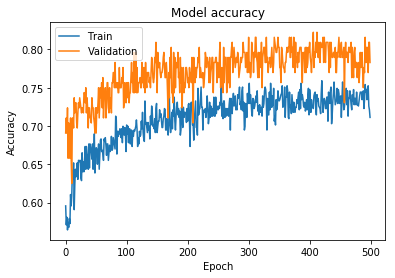

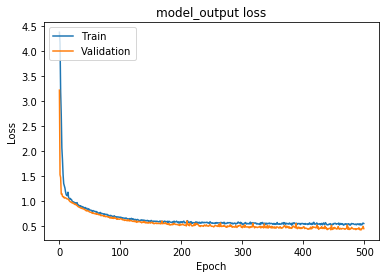

In [9]:

# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Do a Prediction and check the precision

In [10]:

#----------------------
file = 'Test-Group-2.csv'

data2 = pd.read_csv(file,names=['pregnancies','glucose','diastolic','triceps','insulin',
                                'bmi','dpf','age'])
#print(data2.head())

x2 = data2
y_pred = model.predict(x2)
print("X2:"); print(x2)
print("Y_pred:"); print(y_pred)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')
print("\n\n------CLASSIFICATION RESULT VECTOR-------\n"); print(y_pred1); print("\n\n")



X2:
   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0            1      106         76        0        0  37.5  0.197   26
1            6      190         92        0        0  35.5  0.278   66
2            2       88         58       26       16  28.4  0.766   22
3            9      170         74       31        0  44.0  0.403   43
4            9       89         62        0        0  22.5  0.142   33
5           10      101         76       48      180  32.9  0.171   63
6            2      122         70       27        0  36.8  0.340   27
7            5      121         72       23      112  26.2  0.245   30
8            1      126         60        0        0  30.1  0.349   47
9            1       93         70       31        0  30.4  0.315   23
Y_pred:
[[0.18971503]
 [0.57903695]
 [0.07574305]
 [0.74211204]
 [0.22657326]
 [0.42324638]
 [0.26732445]
 [0.2573073 ]
 [0.3189529 ]
 [0.07265262]]


------CLASSIFICATION RESULT VECTOR-------

[0 1 0 1 0 0 0 0 0 0]